In [126]:
import pandas as pd
import numpy as np

In [127]:
df = pd.read_csv('clean_dataset_with_stemming.csv')
df.head()

,Teks,label
0,dek baik,0
1,ikut seminar inspiratif cara mudah sukses bisnis tourtravel jakarta maret hotel mercure daftar namakota wa,1
2,pilih menang cek rupiah juta kuota flash internet kode pin er uinfo hadiah www bit lyundiantelkomsel,1
3,punya masalah uang cukup jamin bpkb mobil pinjmana sesuai butuh bunga over cek bi hubung wasmstlp,1
4,diskn tgel jkerbet bit lysngroy pasar baik game live dingdongpoker dicepoker dealerbola tangkasdominoqq,1


## Data Description

#### TODO : Add data description (maybe words frequencies in each class)

#### Data preview

In [128]:
print('SMS\t:', df.shape[0], 'data\n')
print('consist of :')
print('- Spam SMS\t:', df[df.label == 1].shape[0], 'data')
print('- Non-Spam SMS\t:', df[df.label == 0].shape[0], 'data')

SMS	: 7256 data

consist of :
- Spam SMS	: 4156 data
- Non-Spam SMS	: 3100 data


In [129]:
pd.set_option('display.max_colwidth', -1)

print('sample of Spam SMS')
df[df.label == 1].sample(10)

sample of Spam SMS


,Teks,label
6677,untung cek untuk saing dapat total hadiah juta xl sempat batas xpfb,1
6340,gratis paket data sd gb untuk cukup download aktif tcash wallet tsel meget beli pakai saldo bonus skb tsel memngbyk,1
537,pesan resmi pt planet card dapat hadiah cek tunai nila rupiah juta jatuh menang kode pinbg silah cek www planetcare blogspot com,1
6302,nomor undi pesta hadiah sms banking telkomsel zaerkg menang wisata thailandspd motorspeaker harman kardondllskb informasi tsel mepestahadiahsmsbanking,1
6090,beli gratis jenis minum hari tukar sms excelso pesona square depok promo,1
6394,hari paket rbhari gb internet sms ketik hemat hemat untuk paket gbmnt sms tsel skb promo batas,1
170,rupiah telpon sms unlimited indosat ooredoo internetan puas hari paket ramadhan unlimited ketik,1
4509,mobil bekas daihatsu xenia toyota innova rupiah juta daftar raih bonus gb tsel mepromoinfo sk laku tsel metnc,1
6066,diam buat rang narkoba stopnarkobahani httpcegahnarkoba bnn go id,1
5678,plngg hormat sim card xxxxxx mdptkan hadiah cek tunai rupiah juta pesta isi ulang pinnf uinfo klik www ptmkiosweb tk,1


In [130]:
print('sample of Non-Spam SMS')
df[df.label == 0].sample(10)

sample of Non-Spam SMS


,Teks,label
1650,debit rupiah rekening tb xxx tanggal jam transaksi kenalhub mandiri telepon,0
3000,nomor isi nomor sn,0
5408,logged in untuk bithumb site pc kst,0
1089,oke untuk dp,0
2864,hai ikut kode verifikasi jenius guna kode autentikasi akun jenius untuk aman akun ikan kode pihak mana,0
6903,sukses beli item line store tarif rupiah cek beli httpsstore line me customer service httpscontact line me tarif data laku,0
6873,bca mobile sms guna untuk verifikasi registrasi bca mobile nomor ref vqdtdslbfed tgljam,0
3568,selamat datang simpati cek paket telpon sms internet download mytelkomsel apps tsel memytelkomsel simpati youreverydaydiscoveries,0
4923,bi kk tangerang bibi bibi,0
727,aduh pusing lamar nyari butuh,0


#### Highest word frequencies in each class

In [131]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
words_count_matrix = cv.fit_transform(df['Teks'])
df_count_vect = pd.SparseDataFrame(words_count_matrix, columns=cv.get_feature_names())

In [132]:
# non-spam
df_non_spam_words = df_count_vect[df.label == 0]
non_spam_words_count = df_non_spam_words.sum()
indices = np.argsort(non_spam_words_count)[::-1][:10]
non_spam_words_count = non_spam_words_count[indices]

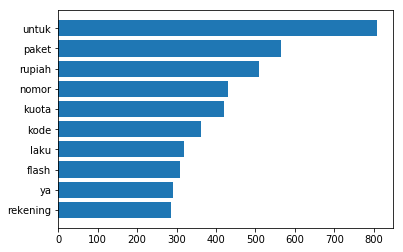

In [133]:
plt.barh(np.arange(len(non_spam_words_count)), non_spam_words_count.values, align='edge', height=0.8)
plt.yticks(np.arange(len(non_spam_words_count)) + 0.4, non_spam_words_count.keys())
plt.gca().invert_yaxis()
plt.show()

In [134]:
# spam
df_spam_words = df_count_vect[df.label == 1]
spam_words_count = df_spam_words.sum()
indices = np.argsort(spam_words_count)[::-1][:10]
spam_words_count = spam_words_count[indices]

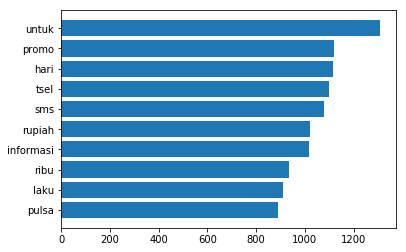

In [135]:
plt.barh(np.arange(len(spam_words_count)), spam_words_count.values, align='edge', height=0.8)
plt.yticks(np.arange(len(spam_words_count)) + 0.4, spam_words_count.keys())
plt.gca().invert_yaxis()
plt.show()

## Feature Extraction

#### TODO: Add more feature extraction

In [155]:
from utils import fair_train_test_split

X = df['Teks']
y = df['label']

X_train, X_test, y_train, y_test = fair_train_test_split(X, y, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5442,), (1814,), (5442,), (1814,))

In [156]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape

(5442, 8114)

In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_train_tfidf.shape

(5442, 8114)

## Model Evaluation

#### TODO: Add more Classifier Model and hyperparameter tuning

In [158]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train_cv, y_train)
print('Multinomial Naive Bayes with count vectorizer\t:', clf.score(cv.transform(X_test), y_test))

clf = MultinomialNB().fit(X_train_tfidf, y_train)
print('Multinomial Naive Bayes with tfidf\t\t:', clf.score(tfidf.transform(X_test), y_test))

Multinomial Naive Bayes with count vectorizer	: 0.9151047409040793
Multinomial Naive Bayes with tfidf		: 0.9013230429988974


In [159]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train_cv, y_train)
print('Logistic Regression with count vectorizer\t:', clf.score(cv.transform(X_test), y_test))

clf = LogisticRegression().fit(X_train_tfidf, y_train)
print('Logistic Regression with tfidf\t\t\t:', clf.score(tfidf.transform(X_test), y_test))

/home/faelyx/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression with count vectorizer	: 0.9366041896361632
Logistic Regression with tfidf			: 0.9355016538037486


In [160]:
from sklearn.svm import LinearSVC

clf = LinearSVC().fit(X_train_cv, y_train)
print('Linear SVC with count vectorizer\t:', clf.score(cv.transform(X_test), y_test))

clf = LinearSVC().fit(X_train_tfidf, y_train)
print('Linear SVC with tfidf\t\t\t:', clf.score(tfidf.transform(X_test), y_test))

Linear SVC with count vectorizer	: 0.9371554575523704
Linear SVC with tfidf			: 0.9404630650496141


/home/faelyx/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
